The motion of a single, undamped (i.e. no friction) pendulum may be described through the ordinary differential equations are:
$$ \frac{d^2 \theta}{dt^2} + g/l \sin(\theta) = 0 $$

where $\theta$ is the angle between the pendulum and vertical, $g$ is the strength of gravity and $l$ is the length of the pendulum.

Force diagram for pendulum:

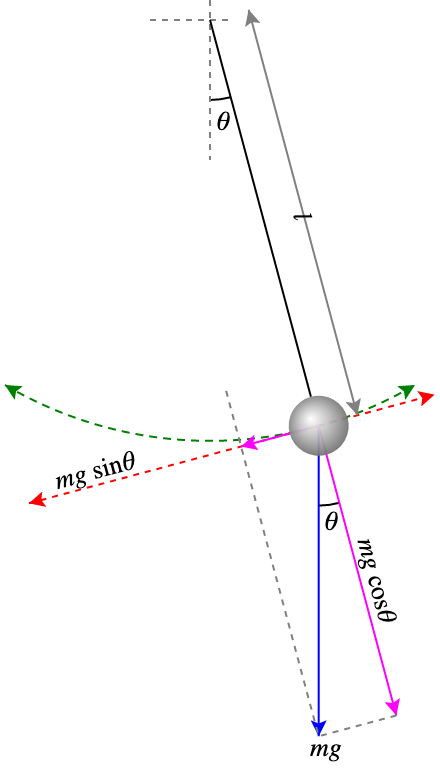

Undamped pendula are somewhat unnatural since, given a small push, they continue to swing forever!

We rewrite as first order system:
$$\begin{aligned} \frac{\partial \theta}{\partial t} &= v\\ \frac{\partial v}{\partial t} &= -g/l \sin(\theta). \end{aligned}$$ 

Through the question we will fix $g$ = $l$ = 1. (We pretend we are living in a world without units!)



Below I implemented the system of ordinary equations using Euler's method subject to the initial conditions $\theta$ = $\theta_0$ and $v$= $v_0$ at $t$ = $0$. 

In [28]:
import numpy as np

# dtheta / dt equation
def dthetadt(v):
    return v
# dvelocity / dt equation
def dvdt(g, l, theta):
    return -1*g / l * np.sin(theta)
# Euler method with velocity calculation for internal testing
def Euler_method(theta0,v0,dt,g,l,n, t0, x0, y0):
    # Variable initialisation
    theta = np.zeros(n+1)
    theta[0] = theta0
    velocity = np.zeros(n+1)
    velocity[0] = v0
    x = np.zeros(n+1)
    x[0] = x0
    y = np.zeros(n+1)
    y[0] = y0
    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = t0 + i*dt
    # Performs Euler method
    for i in range(1, n+1):   
        theta[i] = theta[i-1] +  dt*dthetadt(velocity[i-1])
        velocity[i] = velocity[i-1] +  dt*dvdt(g,l, theta[i-1])
        x[i] = np.sin(theta[i-1]) * l
        y[i] = - np.cos(theta[i-1]) * l
    return t, theta, velocity, x, y

Below I am testing my implementation by plotting the solution with the parameters $dt$ = $6 \pi / 200$, $\theta_0$ = $0$, $v_0$ = $1$ until $T$ = $6 \pi$.
I make two plots, one which shows the $x$-coordinate against the $y$-coordinate and another that shows time $t$ against $\thetaθ$. 

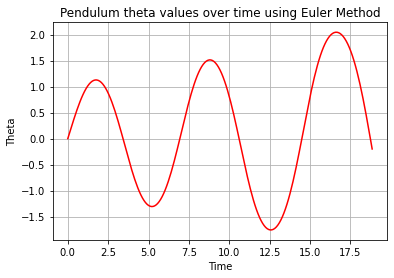

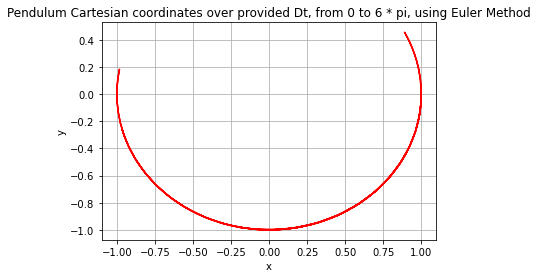

In [29]:
import matplotlib.pyplot as plt

def test_5_1():
    g = l = 1
    dt = (6 * np.pi)/200
    theta0 = 0
    v0 = 1
    t0 = 0
    T = 6 * np.pi
    n = int(T/dt)
    x0 = 0
    y0 = -1
    # Perform Euler method
    t, theta, velocity, x, y = Euler_method(theta0,v0,dt,g,l,n, t0, x0, y0)
    # Draw theta graph
    fig = plt.figure(0)
    plt.plot(t, theta, "-r")
    plt.title("Pendulum theta values over time using Euler Method")
    plt.xlabel("Time")
    plt.ylabel("Theta")
    plt.grid()
    # Draw coordinates graph
    fig = plt.figure(1)
    plt.plot(x, y, "-r")
    plt.title("Pendulum Cartesian coordinates over provided Dt, from 0 to 6 * pi, using Euler Method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    
    plt.show()
    
test_5_1()
    
    

Notice that the maximums of $\theta$ are growing overtime. I am interested in long time solutions. I will investigate this by running the same parameter set ($\theta_0$ = $0$, $v_0$ = $1$ until $T$ = $6 \pi$) but with different size time steps $\mathrm{d}t$.

I ran each method for $\mathrm{d}t = 6 \pi / 20$, $6 \pi / 40$, $6 \pi / 80$, $6 \pi / 160$, $6 \pi / 320$ and $\mathrm{d}t$ = $6 \pi / 200$, $6 \pi / 400$, $6 \pi / 800$, $6 \pi / 1600$, $6 \pi / 3200$ and I made a plot showing how the maxima of $\theta$ increase over time.

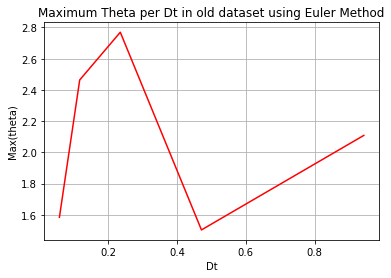

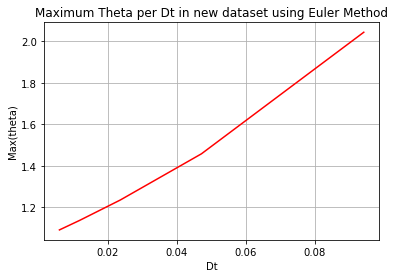

In [30]:
def test_5_3(dt):
    #initialisation
    g = l = 1
    theta0 = 0
    v0 = 1
    t0 = 0
    T = 6 * np.pi
    n = int(T/dt)
    x0 = 0
    y0 = -1
    # Run euler method
    t, theta, velocity, x, y = Euler_method(theta0,v0,dt,g,l,n, t0, x0, y0)   
    #return maximum theta
    return max(theta)

def aTest():
    # Initialises with the provided dt
    dt1 = [6*np.pi/20,6*np.pi/40,6*np.pi/80,6*np.pi/160,6*np.pi/320]
    output1 = np.zeros(len(dt1))
    dt2 = [6*np.pi/200,6*np.pi/400,6*np.pi/800,6*np.pi/1600,6*np.pi/3200]
    output2 = np.zeros(len(dt2))
    # Calculate max theta for each dt
    for i in range(len(dt1)):
        output1[i] = test_5_3(dt1[i])
    for i in range(len(dt2)):
        output2[i] = test_5_3(dt2[i])
    # Draw Max theta for dt1
    fig = plt.figure(1)
    plt.title("Maximum Theta per Dt in old dataset using Euler Method")
    plt.plot(dt1, output1, "-r")
    plt.xlabel("Dt")
    plt.ylabel("Max(theta)")
    plt.grid()
    # Draw max theta for dt2
    fig = plt.figure(0)
    plt.title("Maximum Theta per Dt in new dataset using Euler Method")
    plt.plot(dt2, output2, "-r")
    plt.xlabel("Dt")
    plt.ylabel("Max(theta)")
    plt.grid()
    
    plt.show()
    

aTest()

As $dt$ increases, the value of maximum $θ$ increases. The larger the time step, the less accurate maximum theta should be, so the value of theta should converge to a value represented by the smallest timestep. As such, when time step is small, maximum theta should converge to pi/3 over time.

I made a table for the same simulation values.

In [31]:
def aTestTableNew():
    # Initialises function
    thetaStar = np.pi/3
    dt1 = [6*np.pi/20,6*np.pi/40,6*np.pi/80,6*np.pi/160,6*np.pi/320]
    output1 = np.zeros(len(dt1))
    dt2 = [6*np.pi/200,6*np.pi/400,6*np.pi/800,6*np.pi/1600,6*np.pi/3200]
    output2 = np.zeros(len(dt2))
    print("dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Euler Iterations\n------|-----|-----|-----|")
    # Find max theta and other calculations and print in a valid markdown format
    for i in range(len(dt1)):
        output1[i] = test_5_3(dt1[i])
    for i in range(len(dt2)):
        output2[i] = test_5_3(dt2[i])
        print(f"{dt2[i]:.10f} | {output2[i]:.10f}| {abs(output2[i]-thetaStar):.10f} | {int(6 * np.pi/dt2[i]):.0f}")
        
    
aTestTableNew()

dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Euler Iterations
------|-----|-----|-----|
0.0942477796 | 2.0443243805| 0.9971268294 | 200
0.0471238898 | 1.4583362755| 0.4111387243 | 400
0.0235619449 | 1.2355795630| 0.1883820118 | 800
0.0117809725 | 1.1374897610| 0.0902922098 | 1600
0.0058904862 | 1.0914122426| 0.0442146914 | 3200


dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Euler Iterations
------|-----|-----|-----|
0.0942477796 | 2.0443243805| 0.9971268294 | 200
0.0471238898 | 1.4583362755| 0.4111387243 | 400
0.0235619449 | 1.2355795630| 0.1883820118 | 800
0.0117809725 | 1.1374897610| 0.0902922098 | 1600
0.0058904862 | 1.0914122426| 0.0442146914 | 3200

In [32]:
def aTestTableOld():
    #Initialises values
    thetaStar = np.pi/3
    dt1 = [6*np.pi/20,6*np.pi/40,6*np.pi/80,6*np.pi/160,6*np.pi/320]
    output1 = np.zeros(len(dt1))
    dt2 = [6*np.pi/200,6*np.pi/400,6*np.pi/800,6*np.pi/1600,6*np.pi/3200]
    output2 = np.zeros(len(dt2))
    print("dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Euler Iterations\n------|-----|-----|-----|")
    # Find max theta and other calculations and print in a valid markdown format
    for i in range(len(dt1)):
        output1[i] = test_5_3(dt1[i])
        print(f"{dt1[i]:.10f} | {output1[i]:.10f}| {abs(output1[i]-thetaStar):.10f} | {int(6 * np.pi/dt1[i]):.0f}")
    for i in range(len(dt2)):
        output2[i] = test_5_3(dt2[i])
         
aTestTableOld()

dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Euler Iterations
------|-----|-----|-----|
0.9424777961 | 2.1088123963| 1.0616148451 | 20
0.4712388980 | 1.5036685456| 0.4564709944 | 40
0.2356194490 | 2.7695190544| 1.7223215032 | 80
0.1178097245 | 2.4639933871| 1.4167958359 | 160
0.0589048623 | 1.5847076947| 0.5375101435 | 320


dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Euler Iterations
------|-----|-----|-----|
0.9424777961 | 2.1088123963| 1.0616148451 | 20
0.4712388980 | 1.5036685456| 0.4564709944 | 40
0.2356194490 | 2.7695190544| 1.7223215032 | 80
0.1178097245 | 2.4639933871| 1.4167958359 | 160
0.0589048623 | 1.5847076947| 0.5375101435 | 320

The tables show that generally (clear only in the dataset, named as 'new'), as dt decreases, maximum theta tends to $pi/3$. Therefore, as time step decreases, maximum theta should approach to a more accurate value of itself ($θ*$ = $pi/3$), which can be seen by the $|max(θ)-$θ*$|$ (error calculation) decreasing generally (clear only in new dataset). This is because at dt decreases, the euler method performs more calculations, shown in increasing 'number of Euler iterations'. The smaller the step size is, and the more closely the Euler method will follow the actual solution curve. It seems from the tables above that the Euler method isn't working as intended for the old dataset, due to the time step being too large and even for the new dataset it doesn't approach $pi/3$ quickly so still produces significant error.  

I performed the same calculations as above but instead with the midpoint method to compare them. 

In [33]:
def Midpoint_method(theta0,v0,dt,g,l,n, t0, x0, y0):
    #Initialise variables
    theta = np.zeros(n+1)
    theta[0] = theta0
    velocity = np.zeros(n+1)
    velocity[0] = v0
    x = np.zeros(n+1)
    x[0] = x0
    y = np.zeros(n+1)
    y[0] = y0
    t = np.zeros(n+1)
    # Append the time
    for i in range(n+1):
        t[i] = t0 + i*dt
    # Perform mid point method
    for i in range(1, n+1):
        theta_half = theta[i-1] +  0.5*dt*dthetadt(velocity[i-1])
        velocity_half = velocity[i-1] +  0.5*dt*dvdt(g,l, theta[i-1])
        theta[i] = theta[i-1] + dt*dthetadt(velocity_half)
        velocity[i] = velocity[i-1] +  dt*dvdt(g,l, theta_half)
        x[i] = np.sin(theta[i-1]) * l
        y[i] = - np.cos(theta[i-1]) * l
    
    return t, theta, velocity, x, y

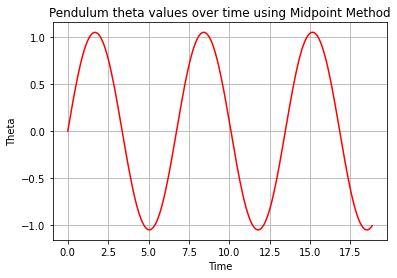

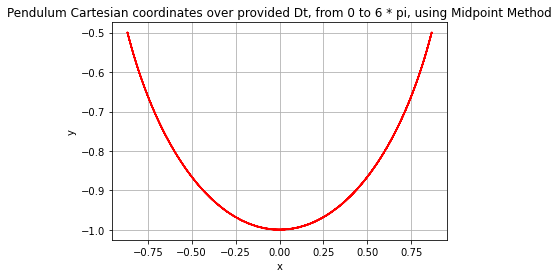

In [34]:
import matplotlib.pyplot as plt

def testMidPoint():
    g = l = 1
    dt = (6 * np.pi)/200
    theta0 = 0
    v0 = 1
    t0 = 0
    T = 6 * np.pi
    n = int(T/dt)
    x0 = 0
    y0 = -1
    # Perform Euler method
    t, theta, velocity, x, y = Midpoint_method(theta0,v0,dt,g,l,n, t0, x0, y0)
    # Draw theta graph
    fig = plt.figure(0)
    plt.plot(t, theta, "-r")
    plt.title("Pendulum theta values over time using Midpoint Method")
    plt.xlabel("Time")
    plt.ylabel("Theta")
    plt.grid()
    # Draw coordinates graph
    fig = plt.figure(1)
    plt.plot(x, y, "-r")
    plt.title("Pendulum Cartesian coordinates over provided Dt, from 0 to 6 * pi, using Midpoint Method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    
    plt.show()
    
testMidPoint()

In [35]:
import matplotlib.pyplot as plt

def test_5_4(dt):
    # Initialise base values
    g = l = 1
    theta0 = 0
    v0 = 1
    t0 = 0
    T = 6 * np.pi
    n = int(T/dt)
    x0 = 0
    y0 = -1
    # Perform midpoint method
    t, theta, velocity, x, y = Midpoint_method(theta0,v0,dt,g,l,n, t0, x0, y0)
    # Return max theta
    return max(theta)
    

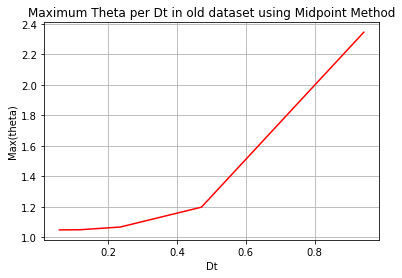

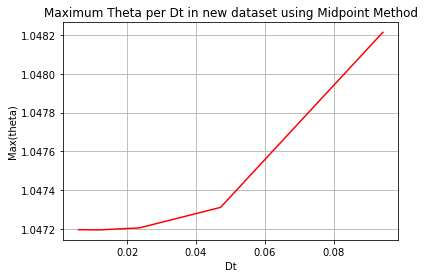

In [36]:
def aTestMid():
    # Initialisation of dt
    dt1 = [6*np.pi/20,6*np.pi/40,6*np.pi/80,6*np.pi/160,6*np.pi/320]
    output1 = np.zeros(len(dt1))
    dt2 = [6*np.pi/200,6*np.pi/400,6*np.pi/800,6*np.pi/1600,6*np.pi/3200]
    output2 = np.zeros(len(dt2))
    # Perform midpoint method using dt provided
    for i in range(len(dt1)):
        output1[i] = test_5_4(dt1[i])
    for i in range(len(dt2)):
        output2[i] = test_5_4(dt2[i])
    # Draw max Theta over provided dt1
    fig = plt.figure(1)
    plt.title("Maximum Theta per Dt in old dataset using Midpoint Method")
    plt.plot(dt1, output1, "-r")
    plt.xlabel("Dt")
    plt.ylabel("Max(theta)")
    plt.grid()
    # Draw max theta for dt2
    fig = plt.figure(0)
    plt.title("Maximum Theta per Dt in new dataset using Midpoint Method")
    plt.plot(dt2, output2, "-r")
    plt.xlabel("Dt")
    plt.ylabel("Max(theta)")
    plt.grid()
    
    plt.show()
    

aTestMid()

In [41]:
def MidPointTestTableNew():
    # Initialise values
    thetaStar = np.pi/3
    dt1 = [6*np.pi/20,6*np.pi/40,6*np.pi/80,6*np.pi*np.pi/160,6*np.pi/320]
    output1 = np.zeros(len(dt1))
    dt2 = [6*np.pi/200,6*np.pi/400,6*np.pi/800,6*np.pi/1600,6*np.pi/3200]
    output2 = np.zeros(len(dt2))
    print("dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Midpoint Iterations\n------|-----|-----|-----|")
    # Prepeare values so they can be printed in markdown
    for i in range(len(dt1)):
        output1[i] = test_5_4(dt1[i])
    for i in range(len(dt2)):
        output2[i] = test_5_4(dt2[i])
        print(f"{dt2[i]:.10f} | {output2[i]:.10f}| {abs(output2[i]-thetaStar):.10f} | {int(6 * np.pi/dt2[i]):.0f}")
        
    
MidPointTestTableNew()

dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Midpoint Iterations
------|-----|-----|-----|
0.0942477796 | 1.0482138464| 0.0010162952 | 200
0.0471238898 | 1.0473119155| 0.0001143643 | 400
0.0235619449 | 1.0472062196| 0.0000086684 | 800
0.0117809725 | 1.0471958426| 0.0000017086 | 1600
0.0058904862 | 1.0471971642| 0.0000003870 | 3200


dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Midpoint Iterations
------|-----|-----|-----|
0.0942477796 | 1.0482138464| 0.0010162952 | 200
0.0471238898 | 1.0473119155| 0.0001143643 | 400
0.0235619449 | 1.0472062196| 0.0000086684 | 800
0.0117809725 | 1.0471958426| 0.0000017086 | 1600
0.0058904862 | 1.0471971642| 0.0000003870 | 3200

In [40]:
#Shows for all dt
def aTestTableOld():
    thetaStar = np.pi/3
    dt1 = [6*np.pi/20,6*np.pi/40,6*np.pi/80,6*np.pi/160,6*np.pi/320]
    output1 = np.zeros(len(dt1))
    dt2 = [6*np.pi/200,6*np.pi/400,6*np.pi/800,6*np.pi/1600,6*np.pi/3200]
    output2 = np.zeros(len(dt2))
    print("dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Midpoint Iterations\n------|-----|-----|-----|")
    for i in range(len(dt1)):
        output1[i] = test_5_4(dt1[i])
        print(f"{dt1[i]:.10f} | {output1[i]:.10f}| {abs(output1[i]-thetaStar):.10f} | {int(6 * np.pi/dt1[i]):.0f}")
    for i in range(len(dt2)):
        output2[i] = test_5_4(dt2[i])
         
aTestTableOld()

dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Midpoint Iterations
------|-----|-----|-----|
0.9424777961 | 2.3456624540| 1.2984649028 | 20
0.4712388980 | 1.1968579586| 0.1496604074 | 40
0.2356194490 | 1.0662637543| 0.0190662031 | 80
0.1178097245 | 1.0484074377| 0.0012098865 | 160
0.0589048623 | 1.0473266655| 0.0001291143 | 320


dt | max(Theta) | \|max(Theta)-Theta*\|| Number of Midpoint Iterations
------|-----|-----|-----|
0.9424777961 | 2.3456624540| 1.2984649028 | 20
0.4712388980 | 1.1968579586| 0.1496604074 | 40
0.2356194490 | 1.0662637543| 0.0190662031 | 80
0.1178097245 | 1.0484074377| 0.0012098865 | 160
0.0589048623 | 1.0473266655| 0.0001291143 | 320

Midpoint method seems to provide more accurate results in more scenarios compared to Euler method and achieves an answer close to $θ*$ much quicker (less number of function calls) than Euler method. The Euler method gets oscillating values for the old dataset, and only managed to consistently get max(theta) tending to $pi/3$ when it was given the new dataset. However, the midpoint method got max(Theta) values tending to $pi/3$ for both the old and new dataset. This is because the midpoint method takes into account the change in the slope over the entire interval, whereas the Euler method only uses the slope at the beginning of the interval, making it much more likely to be accurate in these scenarios. The midpoint method for the two provided datasets produced much more accurate results than Euler method for both datasets, seen by the difference in |max($θ$)-$θ*$| between the methods. This can also be seen when comparing the changing theta values in "Pendulum $θ$ values over time using Midpoint Method" and "Pendulum $θ$ values over time using Euler Method". The amplitude in the 'wave' in Euler method seems to be increasing in with each wavelength, which shows the error of Euler method, as the amplitude in each wavelength should be the same. This is solved in the midpoint method as the amplitude in each wavelength is the same, at least on the values we have tested it on.